<a href="https://colab.research.google.com/github/satichandrala/sati/blob/master/QA_System_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Global Parameters
stop_words = set(stopwords.words('english'))

In [42]:
dataset = pd.read_csv('Uttarakhand.csv')

In [170]:
text22 = dataset.to_string(index=False)


In [33]:
pip install transformers 

     |████████████████████████████████| 2.0MB 5.6MB/s 
     |████████████████████████████████| 3.2MB 40.4MB/s 
     |████████████████████████████████| 890kB 39.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=15ea74b3c7b412419c4741a6428844238d4d4d01424a3899847eae53ffd2d4d7
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [168]:
# remove special characters, numbers, punctuations
dataset['tweet'] = dataset['tweet'].str.replace("[^a-zA-Z]", " ")
dataset['tweet'] = dataset['tweet'].str.replace(r"http\S+", "")

In [169]:
# remove special characters, numbers, punctuations
df = df.replace("[^a-zA-Z#]", " ")
df = df.replace(r"http\S+", "")
df = df.replace(r"#", "")

In [120]:
print(df)

                                            ��t w e e t 
0                                                       
1       H o r r i b l e   n e w s   o u t   o f   # U...
2                                                       
3       P r a y e r   f o r   # U t t a r a k h a n d...
4                                                       
...                                                  ...
24073                                                   
24074   " S o r r y   g u y s ,   I   w i l l   n o t...
24075   � � � � �  � � � � � � � � �   � � � � � � �...
24076                                                   
24077                                                   

[24078 rows x 1 columns]


In [79]:
dataset['tweet'] = dataset['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [83]:
dataset['tweet'] = dataset['tweet'].str.replace(r"#", "")

In [84]:
dataset.head()

,tweet
0,Horrible news Uttarakhand
1,Prayer Uttarakhand
2,Ohhh Please Save Uttarakhand
3,Extremely Hear About Uttarakhand Glacier Break...
4,Prayers Uttarakhand


In [85]:
tokenized_tweet = dataset['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                        [Horrible, news, Uttarakhand]
1                                [Prayer, Uttarakhand]
2                    [Ohhh, Please, Save, Uttarakhand]
3    [Extremely, Hear, About, Uttarakhand, Glacier,...
4                               [Prayers, Uttarakhand]
Name: tweet, dtype: object

In [86]:
dataset.head()

,tweet
0,Horrible news Uttarakhand
1,Prayer Uttarakhand
2,Ohhh Please Save Uttarakhand
3,Extremely Hear About Uttarakhand Glacier Break...
4,Prayers Uttarakhand


In [111]:
text22 = dataset.astype(str)
print(text22)

                                                  tweet
0                             Horrible news Uttarakhand
1                                    Prayer Uttarakhand
2                          Ohhh Please Save Uttarakhand
3     Extremely Hear About Uttarakhand Glacier Break...
4                                   Prayers Uttarakhand
...                                                 ...
8141  Hope everyone fine Prayers Uttarakhand mTGzqycSrF
8142  What responsible would this Situation Stops ra...
8143  Scary scenes coming from Uttarakhand Praying s...
8144  ITBP jawans search rescue operation Tapovan Ch...
8145  Sorry guys will able tweet today saddened burs...

[8146 rows x 1 columns]


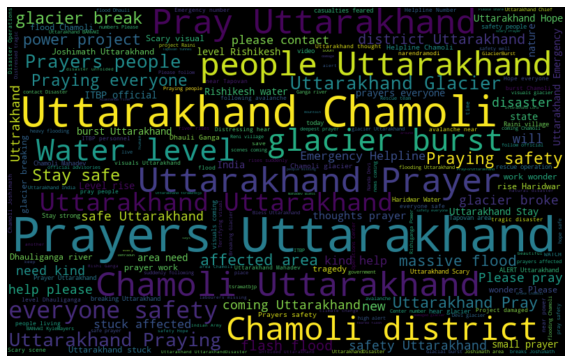

In [87]:
all_words = ' '.join([text for text in dataset['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [88]:
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = TFAutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


In [103]:
text = r"""Horrible news Uttarakhand
                                   Prayer Uttarakhand
                         Ohhh Please Save Uttarakhand
    Extremely Hear About Uttarakhand Glacier Break...
                                  Prayers Uttarakhand"""

In [162]:
questions = [
...     "What happened in Uttarakhand?",
...     "What is the emergency number?",
...     "How many people are affected?",
...]

In [156]:
 from transformers import pipeline

nlp = pipeline("question-answering")

In [ ]:
context = 

In [171]:
for question in questions:
...     inputs = tokenizer(question, text22[:512], add_special_tokens=True, return_tensors="tf")
...     input_ids = inputs["input_ids"].numpy()[0]
...     
...     outputs = model(inputs)
...     answer_start_scores = outputs.start_logits
...     answer_end_scores = outputs.end_logits
...
...     answer_start = tf.argmax(
...         answer_start_scores, axis=1
...     ).numpy()[0]  # Get the most likely beginning of answer with the argmax of the score
...     answer_end = (
...         tf.argmax(answer_end_scores, axis=1) + 1
...     ).numpy()[0]  # Get the most likely end of answer with the argmax of the score
...     answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))
...     print(f"Question: {question}")
...     print(f"Answer: {answer}")

Question: What happened in Uttarakhand?
Answer: horrible news
Question: What are the Emergency numbers?
Answer: uttarakhand prayer uttarakhand
Question: How many people are affected?
Answer: 
Question: Who are doing search rescue ?
Answer: 


AssertionError: ignored